In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f1(x):
    return 1/(1 + x**2)

In [25]:
def trapeze(f, a, b, N): 
    result = 0
    step = (b - a) / N
    for i in range(N):
        a = i * step
        b = (i + 1) * step
        result += (f(a) + f(b)) * step / 2
    return result

def simpson(f, a, b, N):
    result = 0
    step = (b - a) / N
    for i in range(N):
        a = i * step
        b = (i + 1) * step
        result += (f(a) + 4*f((a + b)/2) + f(b)) * step / 6
    return result

In [26]:
trapeze_result = trapeze(f1, 0, 1, 10)
simpson_result = simpson(f1, 0, 1, 10)
analitic = np.arctan(1)
print(f"{trapeze_result=}")
print(f"{simpson_result=}")
print(f"{analitic=}")

trapeze_result=0.7849814972267897
simpson_result=0.7853981632424463
analitic=0.7853981633974483


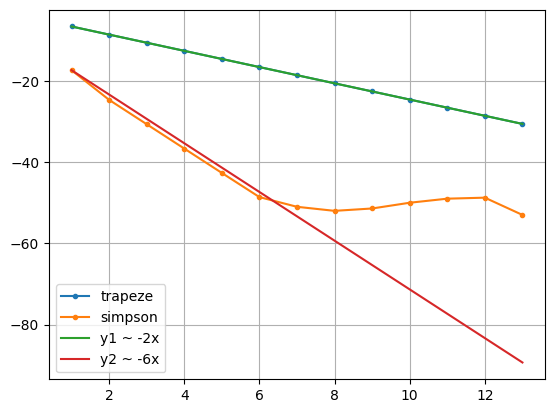

In [33]:
N = 14
error_t = np.zeros(N-1)
error_s = np.zeros(N-1)
n = [2**i for i in range (1, N)]
for i in range(N-1):
    error_t[i] = np.log2(np.abs(trapeze(f1, 0, 1, n[i]) - analitic))
    error_s[i] = np.log2(np.abs(simpson(f1, 0, 1, n[i]) - analitic)) 
plt.plot(np.log2(n), error_t, marker='.', label='trapeze')
plt.plot(np.log2(n), error_s, marker='.', label='simpson')
plt.plot(np.log2(n), np.log2(n)*-2 + 2 + error_t[0], label='y1 ~ -2x')
plt.plot(np.log2(n), np.log2(n)*-6 + 6 + error_s[0], label='y2 ~ -6x')
plt.grid()
plt.legend()
plt.show()

In [28]:
import sys
sys.float_info.epsilon, np.exp(error_s[-7])

(2.220446049250313e-16, 7.095474162284704e-23)

In [29]:
from math import exp, sin
def f2(x):
    return x**(1/3)*exp(sin(x))

In [30]:
trapeze_result = trapeze(f2, 0, 1, 100)
simpson_result = simpson(f2, 0, 1, 100)
print(f"{trapeze_result=}")
print(f"{simpson_result=}")

trapeze_result=1.2952925176412804
simpson_result=1.2957570737817456
